# Working with Text Data and Naive Bayes in scikit-learn

## Agenda

**Working with text data**

- Representing text as data
- Reading SMS data
- Vectorizing SMS data
- Examining the tokens and their counts
- Bonus: Calculating the "spamminess" of each token

**Naive Bayes classification**

- Building a Naive Bayes model
- Comparing Naive Bayes with logistic regression

## Part 1: Representing text as data

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
# start with a simple example
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [139]:
simple_train

['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [140]:
# learn the 'vocabulary' of the training data

### instantiate
vect = CountVectorizer()

### fit
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [141]:
# take a look at the features
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [142]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [143]:
# print the sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [144]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [145]:
# examine the vocabulary and document-term matrix together
import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [146]:
# create a document-term matrix on your own
simple_train_2 = ["Hey dude, what's up?", "Yo brah,you there?", "Nwice, can I come over and play X-Box?"]

In [147]:
simple_train_2

["Hey dude, what's up?",
 'Yo brah,you there?',
 'Nwice, can I come over and play X-Box?']

In [148]:
### instantiate
vect = CountVectorizer()

### fit to learn vocab (it sets the vocab in local memory)
vect.fit(simple_train_2)

### transform (takes tha tlocal momory of words and encodes it to matrix)
simple_train_2 = vect.transform(simple_train_2)

### DTM to DF
pd.DataFrame(simple_train_2.toarray(), columns=vect.get_feature_names())

,and,box,brah,can,come,dude,hey,nwice,over,play,there,up,what,yo,you
0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
2,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [151]:
# transform testing data into a document-term matrix (using existing vocabulary)
# why don't we call .fit?
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [152]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,and,box,brah,can,come,dude,hey,nwice,over,play,there,up,what,yo,you
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Why are you getting an empty dataframe?!!!! Think about how you instantiate CountVectorizer.

You will have to reinstantiate Countvectorizer and go through the instantiate, fit, transform steps on training data before you can do these steps for test data.

In [159]:
# start with a simple example
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

## instantiate
vect = CountVectorizer()

# fit
vect.fit(simple_train)

# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

# transform testing data into a document-term matrix (using existing vocabulary)
# DON'T CALL FIT ON TEST DATA!!!!!
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


**Summary:**

- `vect.fit(train)` learns the vocabulary of the training data
- `vect.transform(train)` uses the fitted vocabulary to build a document-term matrix from the training data
- `vect.transform(test)` uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

## Part 2: Reading SMS data

In [160]:
# read tab-separated file
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
col_names = ['label', 'message']
sms = pd.read_table(url, sep='\t', header=None, names=col_names)
print(sms.shape)

/Users/nicholasbeaudoin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


(5572, 2)


In [161]:
sms.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [162]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [163]:
# convert label to a numeric variable
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [164]:
sms.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [165]:
# What is the length of each message?
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

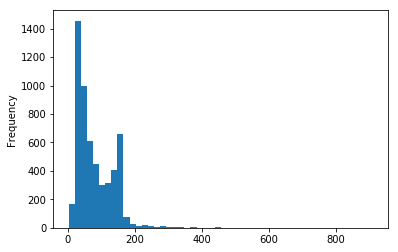

In [166]:
# Plot a pretty picture of the length and show summary statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot
sms['length'].plot(bins=50,kind = 'hist')

# sum stats
sms['length'].describe()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26fd17f0>,
      dtype=object)

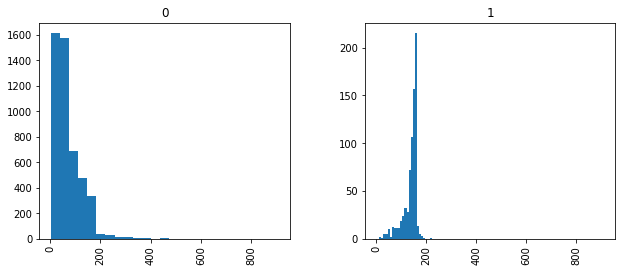

In [167]:
# plot ham and spam in two seperate charts
sms.hist(column='length',by ='label',bins=25,figsize = (10,4), sharex=True)

In [168]:
# define X and y
X = sms.message
y = sms.label

In [169]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


## Part 3: Vectorizing SMS data

In [122]:
# instantiate the vectorizer
vect = CountVectorizer()

In [170]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [171]:
# alternative: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [172]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Part 4: Examining the tokens and their counts

In [174]:
# store token names
X_train_tokens = vect.get_feature_names()

In [175]:
# first 50 tokens
print(X_train_tokens[:50])

['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07090298926', '07123456789', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']


In [176]:
# last 50 tokens
print(X_train_tokens[-50:])

['yer', 'yes', 'yest', 'yesterday', 'yet', 'yetunde', 'yijue', 'ym', 'ymca', 'yo', 'yoga', 'yogasana', 'yor', 'yorge', 'you', 'youdoing', 'youi', 'youphone', 'your', 'youre', 'yourjob', 'yours', 'yourself', 'youwanna', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 'zoe', 'zoom', 'zouk', 'zyada', 'èn', '〨ud']


In [177]:
# view X_train_dtm as a dense matrix
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [178]:
# count how many times EACH token appears across ALL messages in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
X_train_counts

array([ 5, 23,  2, ...,  1,  1,  1], dtype=int64)

In [179]:
X_train_counts.shape

(7456,)

In [180]:
# create a DataFrame of tokens with their counts
pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count')

,token,count
3727,jules,1
4172,mallika,1
4169,malarky,1
4165,makiing,1
4161,maintaining,1
4158,mails,1
4157,mailed,1
4151,magicalsongs,1
4150,maggi,1
4149,magazine,1


## Bonus: Calculating the "spamminess" of each token

In [181]:
# create separate DataFrames for ham and spam
sms_ham = sms[sms.label==0]
sms_spam = sms[sms.label==1]

In [182]:
# learn the vocabulary of ALL messages and save it
vect = CountVectorizer()
vect.fit(sms.message)
all_tokens = vect.get_feature_names()

In [183]:
# create document-term matrices for ham and spam
ham_dtm = vect.transform(sms_ham.message)
spam_dtm = vect.transform(sms_spam.message)

In [184]:
# count how many times EACH token appears across ALL ham messages
import numpy as np
ham_counts = np.sum(ham_dtm.toarray(), axis=0)

In [185]:
# count how many times EACH token appears across ALL spam messages
spam_counts = np.sum(spam_dtm.toarray(), axis=0)

In [186]:
# create a DataFrame of tokens with their separate ham and spam counts
token_counts = pd.DataFrame({'token':all_tokens, 'ham':ham_counts, 'spam':spam_counts})

In [187]:
# add one to ham and spam counts to avoid dividing by zero (in the step that follows)
token_counts['ham'] = token_counts.ham + 1
token_counts['spam'] = token_counts.spam + 1

In [188]:
# calculate ratio of spam-to-ham for each token
token_counts['spam_ratio'] = token_counts.spam / token_counts.ham
token_counts.sort_values('spam_ratio')

,token,ham,spam,spam_ratio
3684,gt,319,1,0.003135
4793,lt,317,1,0.003155
3805,he,232,1,0.004310
6843,she,168,1,0.005952
4747,lor,163,1,0.006135
2428,da,151,1,0.006623
4550,later,136,1,0.007353
1247,ask,90,1,0.011111
6626,said,90,1,0.011111
2714,doing,89,1,0.011236


In [189]:
#observe spam messages that contain the word 'claim'
claim_messages = sms.message[sms.message.str.contains('claim')]

for message in claim_messages[0:5]:
    print(message, '\n')

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. 

Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ 

You are a winner U have been specially selected 2 receive £1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+)  

PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires 

Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app 



## Part 5: Building a Naive Bayes model

We will use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [190]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [191]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [192]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9885139985642498


In [193]:
# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [194]:
# predict (poorly calibrated) probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, ...,
       1.09026171e-06, 1.00000000e+00, 3.98279868e-09])

In [195]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9866431000536962


In [202]:
# print out the classification table
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.96       185

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [196]:
# print message text for the false positives
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [197]:
# print message text for the false negatives
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [198]:
# what do you notice about the false negatives?
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

Note: The EDA section came from the following blog: https://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/